In [1]:
# installing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
df = pd.read_excel("C:/Users/chanhen/Desktop/Fall2023/CPIS342/assignments/covid19_raw.xlsx", sheet_name='TotalCase_Pool')

In [2]:
# Create a new column named 'total' which is the sum of values of all columns except 'Country,Other'
df['total'] = df.loc[:, df.columns != 'Country,Other'].sum(axis=1)

In [3]:
# Find the mean of the data
mean_value = df['total'].mean()

# Classify the data into three levels of risk based on the mean
df['RiskLevel'] = pd.cut(df['total'], bins=[-float("inf"), mean_value - 1, mean_value + 1, float("inf")], labels=['Low', 'Medium', 'High'])

In [4]:
# Select columns where the values meet a specific condition
selected = df.loc[(df['Country,Other'] == 'USA') | (df['Country,Other'] == 'Canada') | (df['Country,Other'] == 'China') | (df['Country,Other'] == 'Chile') | (df['Country,Other'] == 'Saudi Arabia') , ['Country,Other', 'total', 'RiskLevel']]

# Display the DataFrame with the selected columns
print(selected)

   Country,Other    total RiskLevel
0            USA  3625140      High
2          China  1628334      High
14        Canada   165031      High
25         Chile    50845       Low
35  Saudi Arabia    29667       Low


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
# Exclude the 'Country,Other' and 'RiskLevel' columns which contain string values
data_numeric = df.drop(columns=['Country,Other', 'RiskLevel'])

# Perform hierarchical clustering using single linkage
Z = linkage(data_numeric, method='single', metric='euclidean')

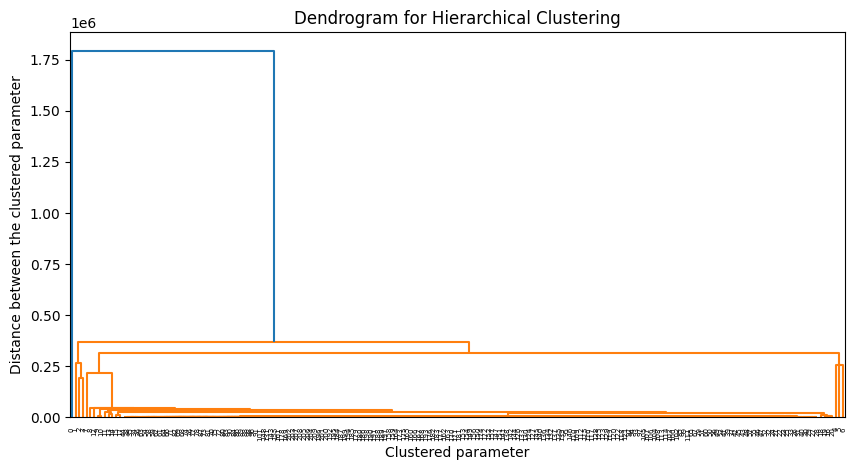

In [7]:
# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Clustered parameter')
plt.ylabel('Distance between the clustered parameter')
plt.show()